# Porto Seguro Data Challenge
https://www.kaggle.com/competitions/porto-seguro-data-challenge/overview

Você provavelmente já recebeu uma ligação de telemarketing oferecendo um produto que você não precisa. Essa situação de estresse é minimizada quando você oferece um produto que o cliente realmente precisa.

Nessa competição você será desafiado a construir um **modelo que prediz a probabilidade de aquisição de um produto**\.

## Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report

## Definição de Funções

In [2]:
def generate_performance_stats(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Accuracy: {}\n".format(metrics.accuracy_score(y_test,y_pred)))
    print("F1-score: {}\n".format(metrics.f1_score(y_test, y_pred)))
    print("Confusion Matrix: \n{}\n".format(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])))

## Carregar a base de dados

In [3]:
raw_data = pd.read_csv('input/train.csv', sep=',')

In [4]:
raw_data.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,...,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,...,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,...,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,...,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,...,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


In [5]:
raw_data.shape

(14123, 70)

In [6]:
# Exibindo os tipos de cada feature (coluna)
raw_data.dtypes

id         int64
var1       int64
var2       int64
var3       int64
var4       int64
          ...   
var65    float64
var66    float64
var67    float64
var68    float64
y          int64
Length: 70, dtype: object

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14123 entries, 0 to 14122
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14123 non-null  int64  
 1   var1    14123 non-null  int64  
 2   var2    14123 non-null  int64  
 3   var3    14123 non-null  int64  
 4   var4    14123 non-null  int64  
 5   var5    14123 non-null  int64  
 6   var6    14123 non-null  int64  
 7   var7    14123 non-null  int64  
 8   var8    14123 non-null  int64  
 9   var9    14123 non-null  int64  
 10  var10   14123 non-null  int64  
 11  var11   14123 non-null  int64  
 12  var12   14123 non-null  int64  
 13  var13   14123 non-null  int64  
 14  var14   14123 non-null  int64  
 15  var15   14123 non-null  int64  
 16  var16   14123 non-null  int64  
 17  var17   14123 non-null  int64  
 18  var18   14123 non-null  int64  
 19  var19   14123 non-null  int64  
 20  var20   14123 non-null  int64  
 21  var21   14123 non-null  int64  
 22

**Não existem valores faltantes NA (not available), mas parecem terem sido substituídos por -999**

In [8]:
raw_data.describe()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
count,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,...,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000
mean,17474.649366,9.712667,23.966579,1584.671245,15179.176025,5543.697869,1315.314168,-109.713729,-138.426680,-106.362388,...,-458.540340,-24.210294,0.073086,0.779221,0.028778,-862.721979,-862.762111,-41.252803,-2.154825,0.201798
std,10249.066602,7.269559,218.429664,1118.101765,9994.295223,3329.493664,1210.074896,350.202420,371.128392,311.608454,...,497.945633,154.485314,0.053963,0.234068,0.018681,342.956927,342.855920,199.275514,48.244171,0.401357
min,1.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,0.000000,0.000000,0.004267,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,8550.500000,4.000000,38.000000,731.000000,6493.500000,2374.000000,482.000000,16.000000,10.000000,1.000000,...,-999.000000,0.169428,0.040391,0.706357,0.018357,-999.000000,-999.000000,0.117647,0.136029,0.000000
50%,17464.000000,5.000000,53.000000,1461.000000,15309.000000,6159.000000,1558.000000,33.000000,24.000000,3.000000,...,0.009003,0.239625,0.060265,0.877901,0.023480,-999.000000,-999.000000,0.176471,0.176471,0.000000
75%,26358.500000,18.000000,110.000000,2481.000000,23818.000000,8594.000000,2438.000000,35.000000,27.000000,3.000000,...,0.152328,0.341919,0.088831,0.930373,0.034581,-999.000000,-999.000000,0.264706,0.220588,0.000000
max,35306.000000,30.000000,129.000000,3546.000000,32403.000000,11373.000000,3001.000000,36.000000,28.000000,3.000000,...,1.000000,0.934994,0.814846,1.000000,0.387386,1.000000,1.000000,0.911765,1.000000,1.000000


In [9]:
#Avaliar a qtdade de valores missing em todas as features

df_missing = raw_data.apply(pd.value_counts)
list_missing = df_missing.iloc[0].transpose()
list_missing.sort_values(ascending=False).head(n=20)

var65    12197.0
var66    12197.0
var60     6484.0
var10     2339.0
var8      2214.0
var59     2182.0
var12     2104.0
var7      1895.0
var6      1871.0
var11     1719.0
var57     1589.0
var56     1587.0
var58     1571.0
var26     1571.0
var9      1534.0
var52     1534.0
var18     1375.0
var17     1375.0
var16     1375.0
var15     1375.0
Name: -999.0, dtype: float64

In [10]:
# Remover as features var65 e var66 , pois as mesmas possuem altas taxas de missing

reduc_data = raw_data.drop(['var65','var66'], axis=1)
reduc_data.shape

(14123, 68)

In [11]:
# Remover os registros com valores -999
# clean_data = reduc_data[(reduc_data.iloc[:,:] != -999).all(axis=1)]
clean_data = reduc_data
clean_data.shape


(14123, 68)

In [12]:
#Deletar a coluna id
clean_data.drop(['id'], axis=1)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var58,var59,var60,var61,var62,var63,var64,var67,var68,y
0,18,19,2853,29442,1386,2435,35,-999,3,63,...,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.132353,0.139706,1
1,4,110,1986,13684,7189,-999,-999,17,3,63,...,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,0.147059,0.106618,0
2,0,39,1019,10232,678,791,16,-999,3,63,...,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,0.382353,0.242647,0
3,20,39,1751,2689,8235,1042,13,10,1,14,...,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.147059,0.132353,0
4,7,44,2262,29428,6031,304,16,-999,3,63,...,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,0.455882,0.132353,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,4,39,2511,28766,1109,2094,31,24,3,-999,...,0.063199,0.122448,-999.000000,0.069347,0.036178,0.869828,0.016160,0.455882,0.147059,0
14119,19,129,1114,-999,6376,-999,-999,27,-999,-999,...,-999.000000,-999.000000,-999.000000,0.295418,0.055899,0.921292,0.018293,0.147059,0.198529,0
14120,27,44,1786,23761,9048,623,35,27,3,14,...,0.034263,0.207001,-999.000000,0.203394,0.040697,0.930373,0.009440,0.397059,0.158088,0
14121,4,89,210,19593,3634,2453,35,27,1,63,...,0.022503,0.200405,0.070788,0.381038,0.100384,0.680121,0.041096,0.264706,0.128676,0


In [13]:
#Preparar um df para plotar a proporção das classes
df_plot = clean_data.groupby("y").agg(
    y_count=('y', 'count')
)
df_plot = df_plot.reset_index().drop(['y'], axis=1)
df_plot

,y_count
0,11273
1,2850


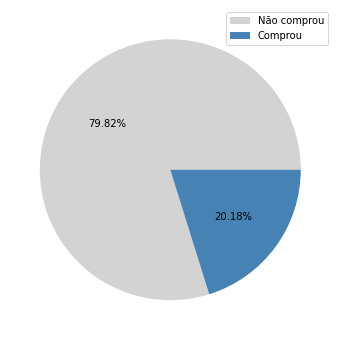

In [14]:
ax = df_plot.plot.pie(y='y_count', labels=['',''], autopct="%.2f%%", colors=['lightgray', 'steelblue'], figsize=(6,6))
ax.set_ylabel("")
ax.legend(loc=1, labels=['Não comprou', 'Comprou'])
plt.show()

**Base de dados desbalanceada**

## Primeira abordagem
Treinar modelos usando diferentes algoritmos e mantendo a base desbalanceada.
80% para treinamento - 20% para validação

In [15]:
# Checkpoint da base de dados limpa
df_prep = clean_data.copy()

In [16]:
# Separar uma base para validação
X_train, X_val = train_test_split(df_prep, test_size=0.20, random_state=13)

In [17]:
df_plot = X_val.groupby("y").agg(
    y_count=('y', 'count')
)
df_plot = df_plot.reset_index().drop(['y'], axis=1)
df_plot

,y_count
0,2257
1,568


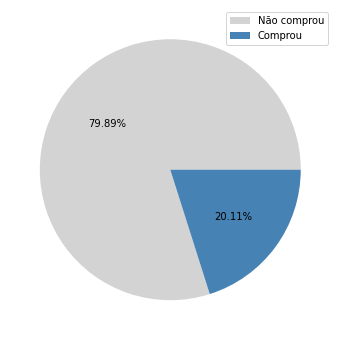

In [18]:
ax = df_plot.plot.pie(y='y_count', labels=['',''], autopct="%.2f%%", colors=['lightgray', 'steelblue'], figsize=(6,6))
ax.set_ylabel("")
ax.legend(loc=1, labels=['Não comprou', 'Comprou'])
plt.show()

In [19]:
df_prep.shape

(14123, 68)

In [20]:
# Número de linhas e colunas da base de treinamento
X_train.shape

(11298, 68)

In [21]:
# Número de linhas e colunas da base de validação
X_val.shape

(2825, 68)

In [22]:
# Separar o target das bases
y_train = X_train['y'].values
X_train = X_train.drop(['id','y'], axis=1)

y_val = X_val['y'].values
X_val = X_val.drop(['id','y'], axis=1)

## Treinar um modelo usando um algoritmo de árvore de decisão para obter as features de maior importância

In [23]:
# define model
clf = DecisionTreeClassifier(random_state=13)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

In [24]:
y_val_pred = clf.predict(X_val)
y_val_predProba = clf.predict_proba(X_val)

In [25]:
y_val_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
y_val_predProba

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [27]:
#Avaliar o modelo com base em algumas métricas de desempenho
print(classification_report(y_val, y_val_pred, digits=3, target_names=['Not Purchased','Purchased']))

               precision    recall  f1-score   support

Not Purchased      0.876     0.856     0.866      2257
    Purchased      0.476     0.519     0.497       568

     accuracy                          0.788      2825
    macro avg      0.676     0.688     0.681      2825
 weighted avg      0.796     0.788     0.792      2825



### Obter as features mais importantes

In [28]:
df_featImport = pd.DataFrame(columns=['feature', 'feat_importance'])

In [29]:
df_featImport['feature'] = X_val.columns
df_featImport['feat_importance'] = clf.feature_importances_
df_featImport = df_featImport.sort_values(by='feat_importance', ascending=False)
df_featImport[0:32]

,feature,feat_importance
3,var4,0.277474
7,var8,0.065022
6,var7,0.037826
54,var55,0.034413
62,var63,0.026988
55,var56,0.025865
61,var62,0.024667
11,var12,0.024401
2,var3,0.023226
58,var59,0.022295


## Treinar um modelo usando um algoritmo de regressão logística e as 30 features mais importantes

In [30]:
# Listando as 30 features mais importantes
list_vars = df_featImport.iloc[0:32,0]
list_vars

3      var4
7      var8
6      var7
54    var55
62    var63
55    var56
61    var62
11    var12
2      var3
58    var59
34    var35
60    var61
4      var5
63    var64
65    var68
51    var52
12    var13
57    var58
1      var2
64    var67
0      var1
10    var11
59    var60
39    var40
36    var37
31    var32
42    var43
32    var33
41    var42
33    var34
56    var57
20    var21
Name: feature, dtype: object

In [31]:
X_trainLG = X_train[list_vars]
X_trainLG

,var4,var8,var7,var55,var63,var56,var62,var12,var3,var59,...,var60,var40,var37,var32,var43,var33,var42,var34,var57,var21
6922,25651,27,35,0.219170,0.948537,0.760,0.037451,7833,870,0.159668,...,0.158298,11,3,11,10,4,21,19,0.101075,2093
10307,24797,27,35,0.205353,0.916246,0.167,0.033825,7864,1334,0.023013,...,0.568548,3,0,15,5,4,21,44,0.833333,2068
1126,17724,9,12,0.202340,0.906155,0.626,0.054332,7303,1363,0.196151,...,0.152581,8,0,21,11,1,26,10,0.101075,2415
6308,22574,-999,35,0.214305,0.974773,0.962,0.016550,3110,2521,0.244603,...,0.033076,14,0,19,10,3,13,21,0.000000,426
4929,27806,-999,35,0.204691,0.886983,0.881,0.096312,1117,-999,0.145784,...,0.007980,0,21,11,5,5,28,5,0.053763,2220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,29633,-999,35,0.204302,0.823411,0.990,0.102210,2383,1263,0.223703,...,0.137201,14,0,13,17,2,29,25,0.000000,2093
10982,-999,-999,-999,0.232241,0.925328,-999.000,0.058294,-999,-999,-999.000000,...,-999.000000,7,17,7,16,2,20,29,-999.000000,1445
7696,17682,27,35,0.202998,0.908174,0.160,0.046374,5208,839,0.187917,...,0.143567,13,1,19,6,6,23,31,0.833333,1535
74,20051,19,-999,0.206457,0.957619,0.844,0.069603,2827,1865,0.267050,...,-999.000000,5,4,7,4,2,21,4,0.078495,2286


In [32]:
X_valLG = X_val[list_vars]
X_valLG

,var4,var8,var7,var55,var63,var56,var62,var12,var3,var59,...,var60,var40,var37,var32,var43,var33,var42,var34,var57,var21
8197,26242,27,35,0.220330,0.877901,0.039,0.059761,1654,1166,0.500756,...,0.395668,1,30,19,6,5,26,54,1.000000,2093
10886,16292,27,35,0.204146,0.940464,0.387,0.042556,8460,3530,0.062852,...,0.621666,5,3,13,11,3,24,21,0.172043,914
8894,730,12,16,0.209480,0.915237,0.360,0.026009,4020,2479,0.184402,...,-999.000000,3,1,9,7,4,21,3,0.246237,1721
10842,32217,27,35,0.215345,0.909183,-999.000,0.038475,-999,796,-999.000000,...,-999.000000,0,0,0,4,6,21,0,-999.000000,1685
9727,24813,27,35,0.219854,0.788093,0.800,0.039725,4388,1196,0.014947,...,0.000000,6,1,12,5,6,26,19,0.101075,1355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,1580,12,16,0.278736,0.854692,0.803,0.133707,914,3226,0.229489,...,-999.000000,1,4,17,3,3,27,3,0.078495,2109
2886,12639,27,-999,0.207176,0.153380,0.186,0.058936,4200,3223,0.188202,...,0.035607,8,25,9,4,2,29,29,0.731183,2093
907,1957,24,-999,0.215254,0.428860,0.170,0.191430,524,1986,0.141610,...,-999.000000,10,10,17,0,5,27,12,0.731183,1502
3045,8442,27,35,0.207064,0.869828,0.848,0.275691,7573,3488,0.153566,...,0.033799,11,16,19,15,4,29,36,0.078495,2093


In [33]:
# define class weights
w = {0:20, 1:80}
# define model
clf2 = LogisticRegression(random_state=13, class_weight=w, max_iter=10000000)
clf2.fit(X_trainLG, y_train)

LogisticRegression(class_weight={0: 20, 1: 80}, max_iter=10000000,
                   random_state=13)

In [34]:
y_val_predLG = clf2.predict(X_valLG)
y_val_predProbaLG = clf2.predict_proba(X_valLG)

In [35]:
y_val_predLG

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
y_val_predProbaLG

array([[0.68025766, 0.31974234],
       [0.52506936, 0.47493064],
       [0.75159624, 0.24840376],
       ...,
       [0.98158854, 0.01841146],
       [0.71785052, 0.28214948],
       [0.79707361, 0.20292639]])

In [37]:
#Avaliar o modelo com base em algumas métricas de desempenho
# generate_performance_stats(y_val, y_val_predLG)
print(classification_report(y_val, y_val_predLG, digits=3, target_names=['Not Purchased','Purchased']))

               precision    recall  f1-score   support

Not Purchased      0.906     0.787     0.843      2257
    Purchased      0.444     0.676     0.536       568

     accuracy                          0.765      2825
    macro avg      0.675     0.732     0.689      2825
 weighted avg      0.813     0.765     0.781      2825



## Testar o modelo na base de teste

In [38]:
# Utilizar toda a base de treinamento para treinar o modelo final (treinamento + validação)
X_train = df_prep[list_vars].copy()
y_train = df_prep['y']
X_train.head()

,var4,var8,var7,var55,var63,var56,var62,var12,var3,var59,...,var60,var40,var37,var32,var43,var33,var42,var34,var57,var21
0,29442,-999,35,0.212414,0.632694,0.137,0.056146,1166,2853,0.058070,...,0.311441,9,2,16,6,3,25,44,0.833333,2068
1,13684,17,-999,0.228784,0.773966,0.308,0.070991,497,1986,0.248909,...,-999.000000,7,1,14,3,0,30,1,0.305376,2417
2,10232,-999,16,0.204636,0.980827,0.213,0.051046,562,1019,0.214520,...,-999.000000,3,3,11,5,1,23,3,0.451613,664
3,2689,10,13,0.208299,0.951564,0.716,0.044301,6541,1751,0.349421,...,-999.000000,10,0,8,10,0,22,11,0.101075,839
4,29428,-999,16,0.222896,0.906155,0.596,0.059125,7238,2262,0.189641,...,0.021226,5,3,17,5,4,26,3,0.101075,270


In [43]:
# define class weights
w = {0:20, 1:80}
# define model
clf2 = LogisticRegression(random_state=13, class_weight=w, max_iter=10000000)
clf2.fit(X_train, y_train)

LogisticRegression(class_weight={0: 20, 1: 80}, max_iter=10000000,
                   random_state=13)

In [44]:
# Carregar a base de teste
X_test_raw = pd.read_csv('input/test.csv', sep=',')

In [45]:
X_test_raw.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,0,5,126,1353,28956,743,1289,27,-999,1,...,0.201839,0.353965,0.166641,0.049108,0.986882,0.016683,-999.0,-999.0,0.176471,0.253676
1,2,6,126,1446,7803,5151,935,35,-999,3,...,0.072127,0.074555,0.217009,0.144403,0.892028,0.038323,-999.0,-999.0,0.147059,0.099265
2,4,5,44,243,4325,1109,1903,33,24,1,...,0.324770,0.384992,0.330680,0.072864,0.930373,0.021052,-999.0,-999.0,0.294118,0.136029
3,7,4,53,419,743,7750,183,35,-999,3,...,0.131070,-999.000000,0.244936,0.158088,0.986882,0.022649,-999.0,-999.0,0.294118,0.220588
4,15,4,126,1863,22693,5625,965,9,-999,3,...,0.225166,0.059940,0.252794,0.080405,0.944501,0.021806,-999.0,-999.0,0.352941,0.113971


In [46]:
X_test = X_test_raw[list_vars]
X_test.shape

(21183, 32)

In [47]:
# Realizar a predição
y_pred = clf2.predict(X_test)

In [48]:
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

## Criar arquivo para submissão

In [49]:
df_submission = pd.read_csv('input/submission_sample.csv', sep=',')
df_submission.head()

,id,predicted
0,0,1
1,2,1
2,4,1
3,7,0
4,15,1


In [50]:
df_submission['predicted'] = y_pred
df_submission.head()

,id,predicted
0,0,1
1,2,1
2,4,0
3,7,1
4,15,1


In [51]:
# Salvar o arquivo para submissão
df_submission.to_csv('output/benchmark.csv', index=False, sep=",", encoding='utf-8')